# WCWH Rollout Preparation
Working to get the beacons ready for their next adventure. 

In [118]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
sys.path.append('../')

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from src.visualization import visualize

from src.calibration import calibrate

import math
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Calibration
With access to higher-grade instruments, we start to look at the possibility of calibrating the sensors to get more-reliable results. We look at two primary ways of calibrating the beacons:

1. Constant/Offset
2. Linear Regression

## Experiment Details
Here are the relevant notes from the calibration experiments:
1. Experiment 1
 - **Start**: datetime(2021,5,10,14,5,0)
 - **End**: datetime(2021,5,10,23,59,0)
 - **Beacons**: [1,2,4,5,6,7,10,11,12,13,14,15,16,19,21]
 - **Events**:
     - 14:15 - 14:25: CO2 cylinder open
     - 14:25 - 14:40: Candle burning
     - 14:40 - 14:50: CO2 cylinder open
     - 14:50 - 15:05: candle burning
 - **Notes**:
     - B26 added at 14:36
2. Experiment 2
 - **Start**: datetime(2021,5,11,16,30,0)
 - **End**: datetime(2021,5,11,17,30,0)
 - **Beacons**: [1,2,4,5,6,7,10,11,12,13,14,15,16,19,21]
 - **Events**:
     - 16:35 - 17:10: Candle and paper burning
     - 16:40 - 16:55: CO2 cylinder open
     
3. Experiment 3
 - **Start**: datetime(2021,5,21,9,23,0)
 - **End**: datetime(2021,5,21,12,23,0)
 - **Beacons**: [1,2,4,5,6,7,9,10,11,12,14,15,16,19,21,23,25,26,28,29]
 - **Events**:
     - 16:35 - 17:10: Candle and paper burning

### Defining Calibration Object
We use the `Calibration` class from the UTx000 Project.

In [236]:
c = calibrate.Calibration(datetime(2021,5,21,9,23,0),datetime(2021,5,21,12,23,0),"../data/",study="wcwh_pilot",study_suffix="wcwh_s21",)

IMPORTING REFERENCE DATA
File not found - ../data/calibration/no_05212021.csv
IMPORTING BEACON DATA
No files found for beacon 3.
No files found for beacon 20.
No files found for beacon 24.
No files found for beacon 30.
No files found for beacon 31.
No files found for beacon 32.
No files found for beacon 33.
No files found for beacon 34.
No files found for beacon 35.
No files found for beacon 36.
No files found for beacon 37.
No files found for beacon 38.
No files found for beacon 39.
No files found for beacon 40.
No files found for beacon 41.
No files found for beacon 42.
No files found for beacon 43.
No files found for beacon 44.
No files found for beacon 45.
No files found for beacon 46.
No files found for beacon 47.
No files found for beacon 48.
No files found for beacon 49.
No files found for beacon 50.


## Inspection
Some simple functions to inspect measurements

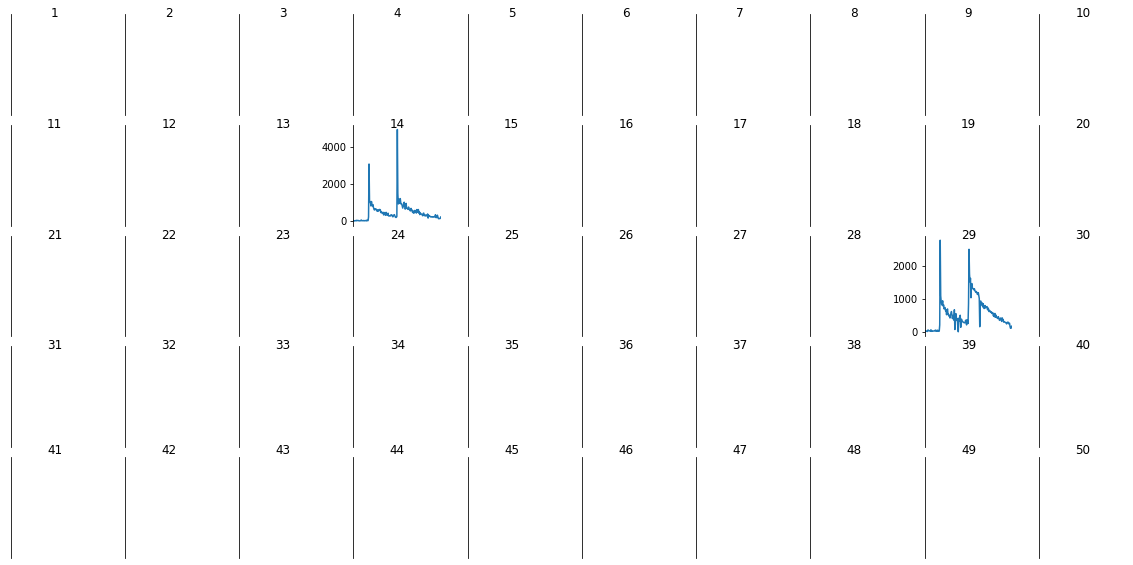

In [226]:
c.inspect_by_beacon_by_param()

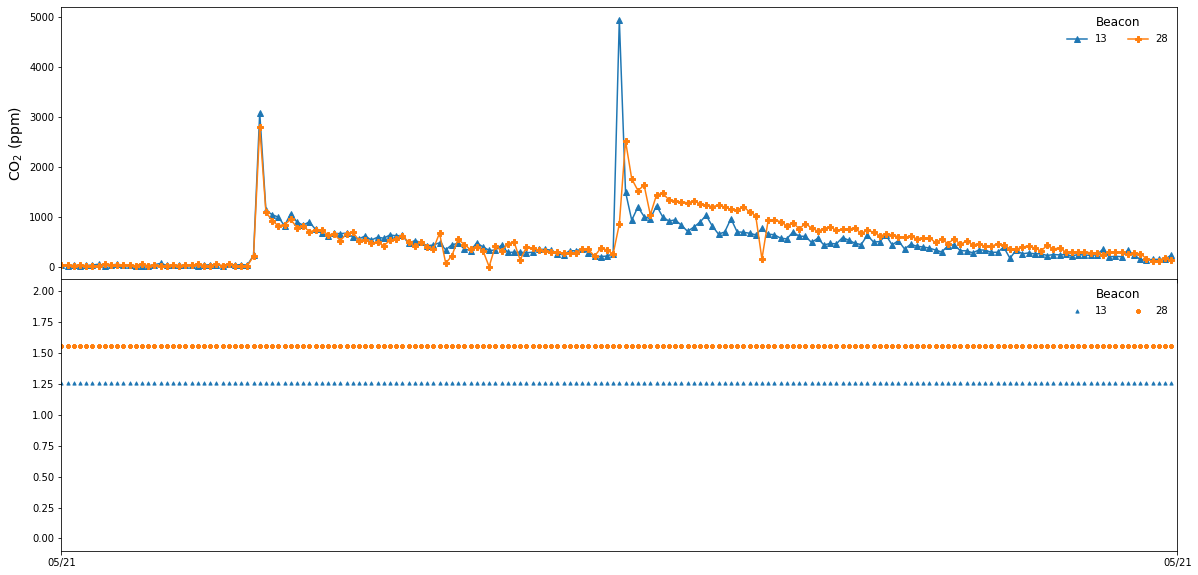

In [237]:
c.inspect_timeseries()

## Diagnostics

### Non-Responsive Beacons
The ```get_reporting_beacons``` functions determines which of the beacons that was included in the calibration event are not shown in the following figures because of issues related to power, sensor connection, or VPN connection.

In [ ]:
missing, reporting = c.get_reporting_beacons("co")

## Comparison
As an initial exploration, we can also look into how the beacon measurements relate to the reference measurements. 

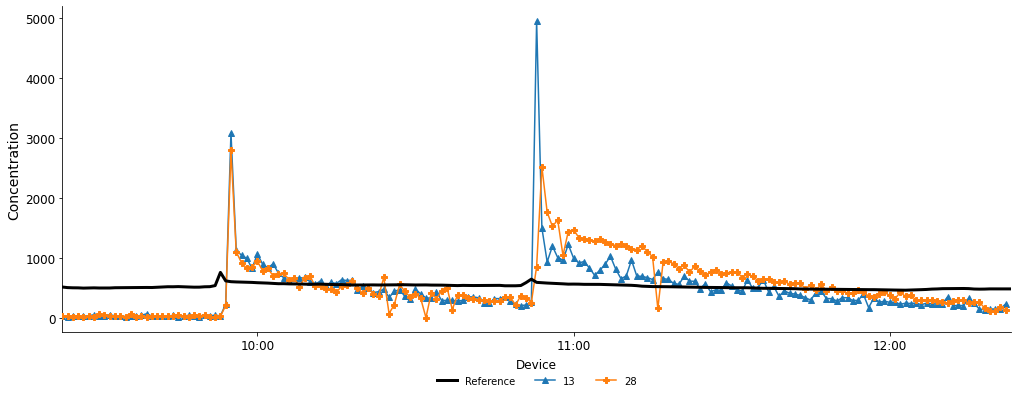

In [224]:
c.compare_time_series("co2")

## Constant/Offset
For the `co` sensor, we do not have a reference monitor and therefore cannot accurately calibrate this sensor against other measurements. Instead, we can determine a constant offset assuming a clean, background concentration of 0 ppm. 

In [230]:
c.offset("co")

## Linear Model

In [239]:
c.linear_regression("pm2p5_mass")

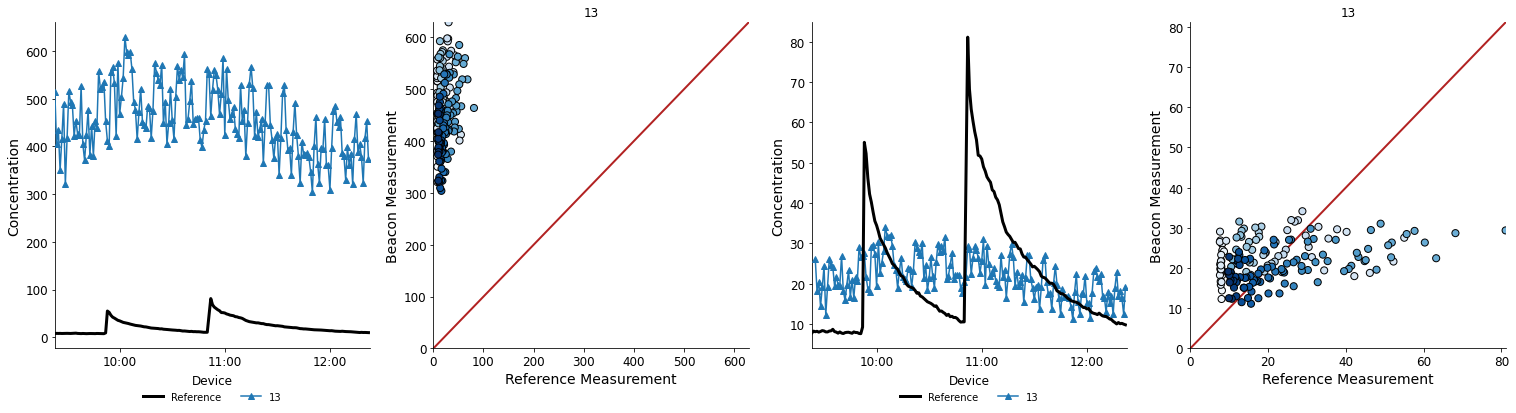

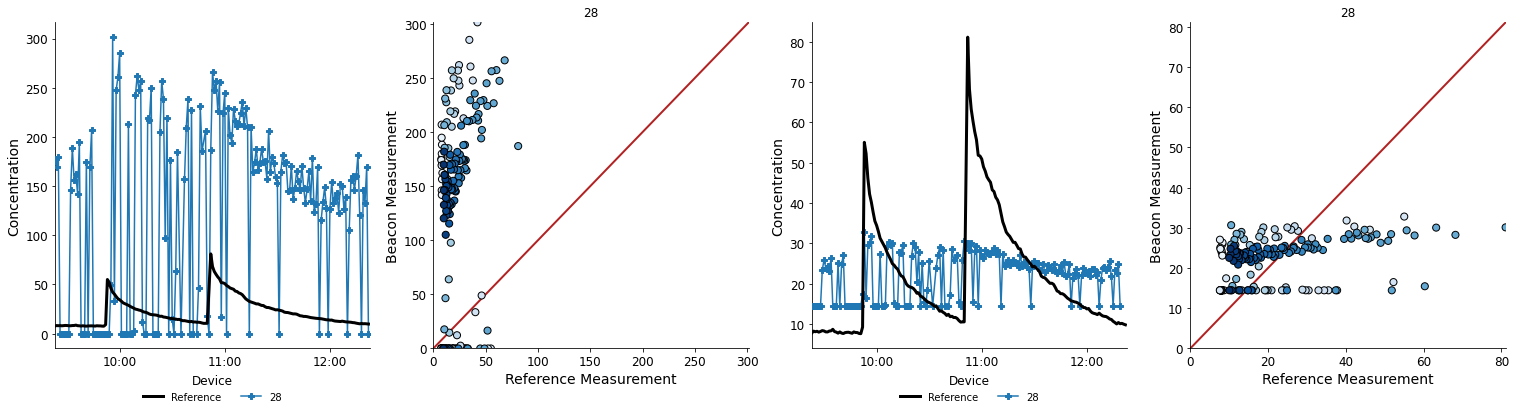

In [240]:
c.show_linear_correction("pm2p5_mass",min_val=0)